In [11]:
                   #   1   #
!pip install face_recognition

In [12]:
                   #   2     #
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(218, 178, 3)


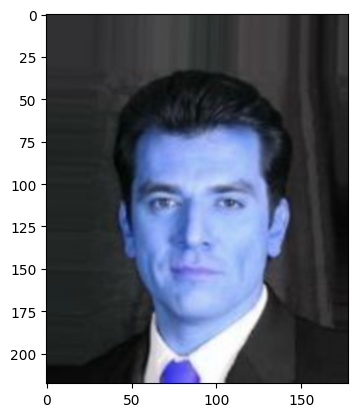

In [13]:
                  #    3     #
import face_recognition
import cv2
import numpy as np
import csv
import sysconfig
from datetime import datetime
import matplotlib.pyplot as plt

AAA_image = cv2.imread('/content/drive/My Drive/attendance_system/photos/AAA.jpg')
AAA_encoding = face_recognition.face_encodings(AAA_image)[0]

BBB_image = cv2.imread('/content/drive/My Drive/attendance_system/photos/BBB.jpg')
BBB_encoding = face_recognition.face_encodings(BBB_image)[0]

DDD_image = cv2.imread('/content/drive/My Drive/attendance_system/photos/DDD.jpg')
DDD_encoding = face_recognition.face_encodings(DDD_image)[0]

Ebeid_image = cv2.imread('/content/drive/My Drive/attendance_system/photos/Ebeid.jpg')
Ebeid_encoding = face_recognition.face_encodings(Ebeid_image)[0]

known_face_encoding = [ AAA_encoding, BBB_encoding,DDD_encoding,Ebeid_encoding]
known_faces_names = [ "AAA","BBB","DDD","Ebeid"]

plt.imshow(BBB_image, cmap = 'gray', interpolation = 'bicubic')
print(BBB_image.shape)

students = known_faces_names.copy()

face_locations = []
face_encodings = []
face_names = []
s=True

now = datetime.now()
current_date = now.strftime("%Y-%m-%d")

f = open(current_date+'.csv','w+',newline = '')
lnwriter = csv.writer(f)


In [14]:
print(students)

['AAA', 'BBB', 'DDD', 'Ebeid']


In [15]:
# function to capture image from camera web                  #        4       #
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


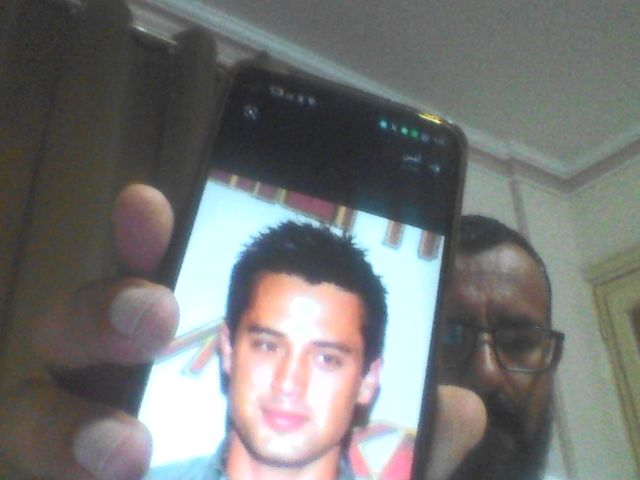

In [18]:
                 #       5          #
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [19]:
                        #      6    #
import sys
from google.colab.patches import cv2_imshow
img = cv2.imread('photo.jpg')
#print(sys. getsizeof(known_face_encoding) )
run=1
while (run<3):
    #_,frame = video_capture.read()
    #small_frame = cv2.resize(frame,(0,0),fx=0.25,fy=0.25)
    #print(frame)
    #cv2_imshow(frame)

    frame=img
    small_frame = cv2.resize(frame,(0,0),fx=0.25,fy=0.25)
    #rgb_small_frame = small_frame[:,:,::-1]
    rgb_small_frame = small_frame[:,:,:]
    #plt.imshow(rgb_small_frame, cmap = 'gray', interpolation = 'bicubic')

    if s:
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame)

        face_names = []

        for face_encoding in face_encodings:
            matches = face_recognition.compare_faces(known_face_encoding,face_encoding)

            name=""
            face_destance = face_recognition.face_distance(known_face_encoding,face_encoding)

            best_matches_index = np.argmin(face_destance)

            if matches[best_matches_index]:
                name = known_faces_names[best_matches_index]


            face_names.append(name)
            if name in known_faces_names:
                if name in students:
                    students.remove(name)
                    current_time = now.strftime("%H-%M-%S")
                    lnwriter.writerow([name,current_time])
    #cv2_imshow(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break
    run=run+1

#video_capture.release()
#cv2.destroyAllWindows()
print("The measured Distances are:  ",face_destance,"\n")
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/Africa/Egypt /etc/localtime
current_time=!date

print("Attendant Name:    ", name,"\n" )
print("Attendance Time:   ", current_time)

The measured Distances are:   [0.78250715 0.76943319 0.45167428 0.61269076] 

Attendant Name:     DDD 

Attendance Time:    ['Mon Apr 29 06:48:14 AM UTC 2024']
